# **Tối ưu hàm số**
Đầu vào:
+ Hàm $f(x,y) = \dfrac{x^4}{10} - \dfrac{2x^3}{15} - \dfrac{2x^2}{5} + y^2 + \dfrac{32}{30}$
+ $(x, y) \in [lower, upper]^2$

Đầu ra:
+ Một lời giải $(x_i, y_i)$
+ Giá trị nhỏ nhất $f_{min}(x, y)$

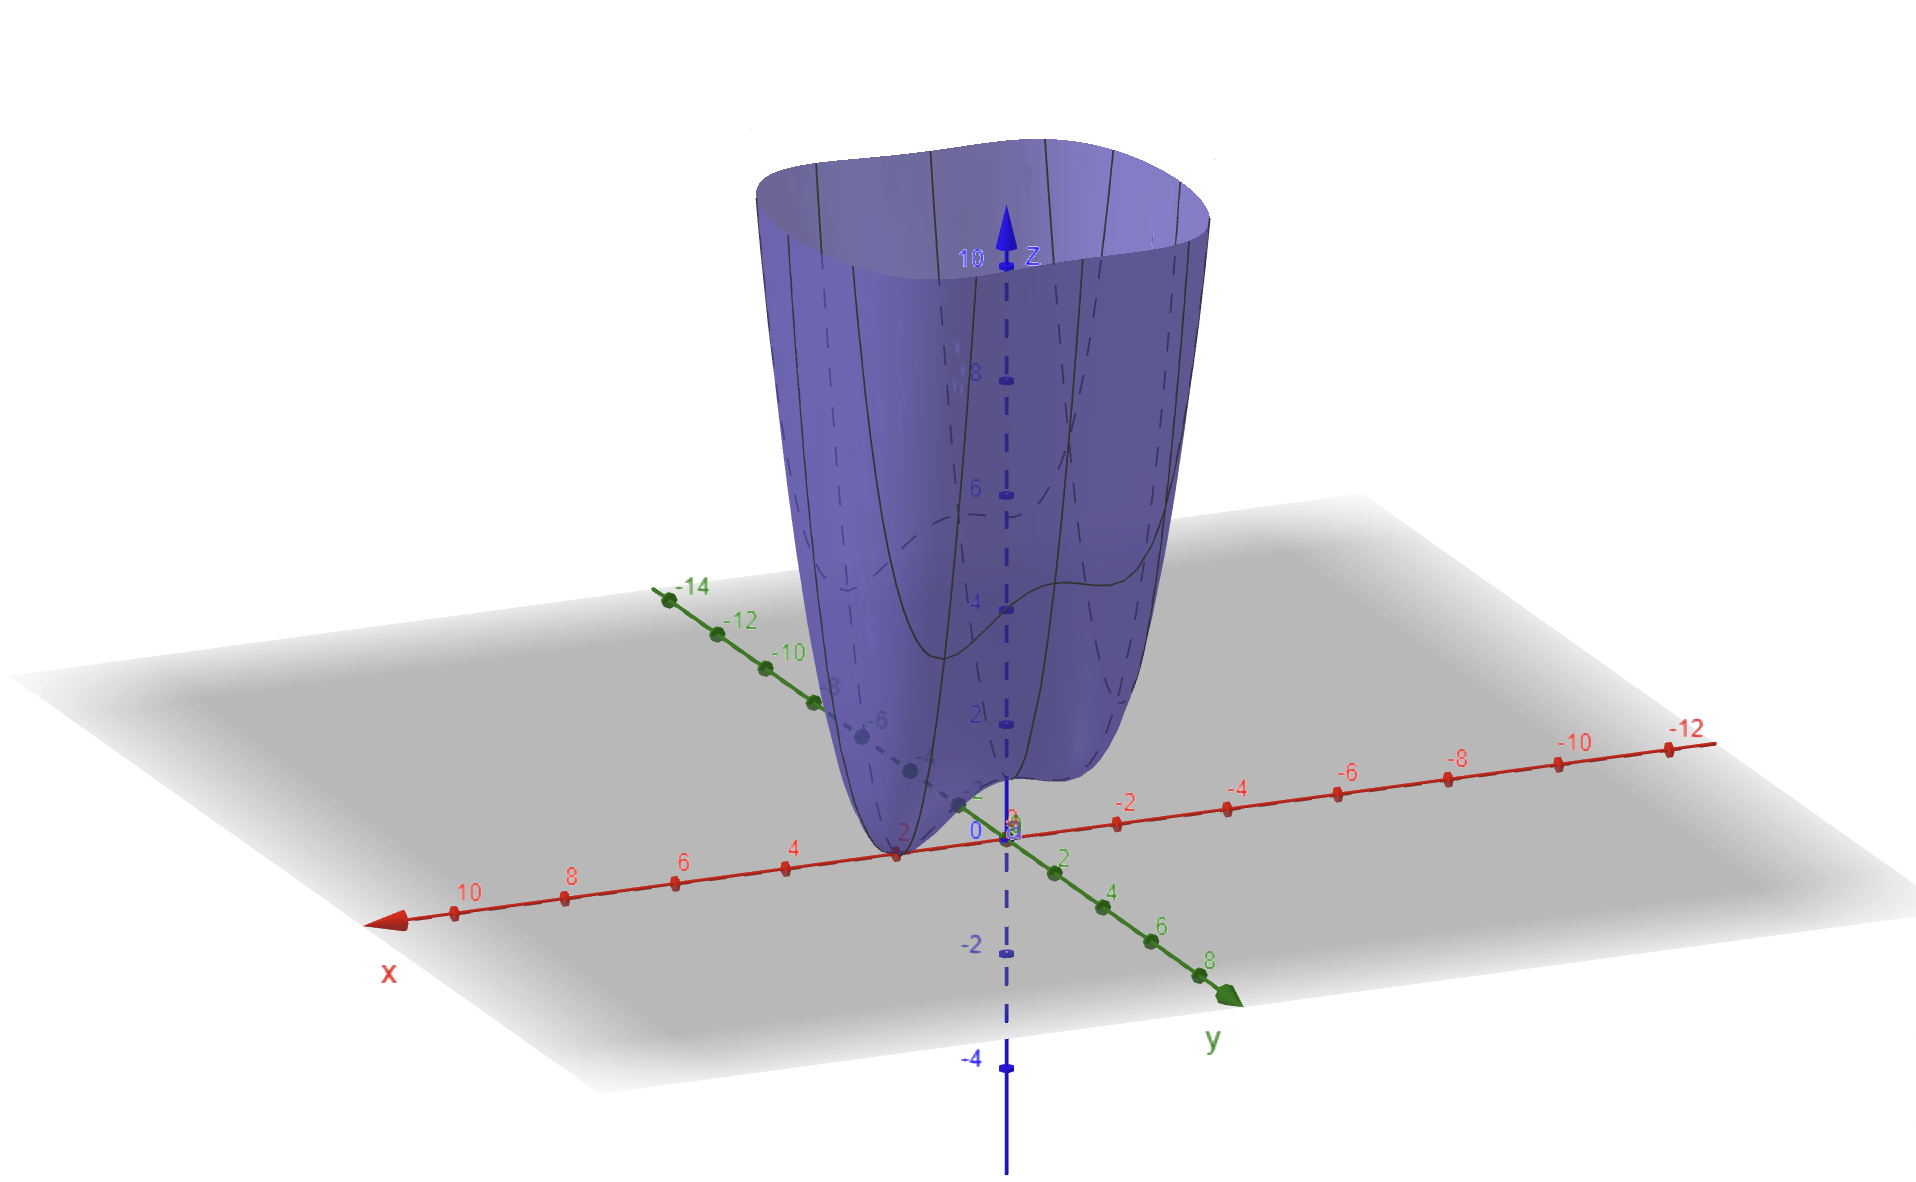

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

In [7]:
class Problem:
  def __init__(self, D, LB, UB): #D: số chiều, LB: lower bound, UB: upper bound
    self.D = D
    self.LB = LB
    self.UB = UB

In [8]:
def decode(position, problem: Problem):
  x = position * (problem.UB - problem.LB) + problem.LB
  x = np.clip(x, problem.LB, problem.UB)
  return x

def get_fitness(x):
  fx = (x[0]**4)/10 - (2*x[0]**3)/15 - (2*x[0]**2)/5 + x[-1]**2 + 32/30
  return -fx

In [9]:
class Individual:
  def __init__(self):
    self.chromosome = None
    self.fitness = None

  def genInd(self, problem: Problem):
    self.chromosome = np.random.uniform(0.0, 1.0, problem.D)

  def cal_fitness(self, problem):
    x = decode(self.chromosome, problem)
    self.fitness = get_fitness(x)

  def clone(self):
    return copy.deepcopy(self)

  def __repr__(self):
    return f"Chromosome = {self.chromosome}, fitness = {self.fitness}"

In [10]:
def crossover(parent1, parent2, problem: Problem, eta = 10.0):
  off1 = Individual()
  off2 = Individual()
  r = np.random.rand()

  if (r <= 0.5):
    beta = (2 * r) ** (1.0 / (eta + 1))
  else:
    beta = (1.0 / (2 * (1 - r))) ** (1.0 / (eta + 1))

  p1 = parent1.chromosome
  p2 = parent2.chromosome

  c1 = 0.5 * ((1 + beta) * p1 + (1 - beta) * p2)
  c2 = 0.5 * ((1 - beta) * p1 + (1 + beta) * p2)

  c1 = np.clip(c1, 0.0, 1.0)
  c2 = np.clip(c2, 0.0, 1.0)

  off1.chromosome = c1
  off2.chromosome = c2

  return off1.clone(), off2.clone()

In [11]:
def mutation(individual, eta = 10.0):
  indi = individual.clone()
  chr = indi.chromosome
  for i in range(chr.size):
    mu = np.random.rand()
    if (mu <= 0.5):
      delta = (2 * mu) ** (1.0 / (eta + 1)) - 1
      chr[i] = chr[i] + delta * chr[i]
    else:
      delta = 1 - (2 - 2 * mu) ** (1.0 / (eta + 1))
      chr[i] = chr[i] + delta * (1 - chr[i])

  chr = np.clip(chr, 0.0, 1.0)
  indi.chromosome = chr
  return indi.clone()

In [12]:
class Population:
  def __init__(self, pop_size, problem: Problem):
    self.pop_size = pop_size
    self.list_indi = []
    self.problem = problem

  def genPop(self):
    for i in range(self.pop_size):
      indi = Individual()
      indi.genInd(self.problem)
      indi.cal_fitness(self.problem)
      self.list_indi.append(indi)

  def __repr__(self):
    pass

In [13]:
def selection(list, k = 2):
  tour1 = random.sample(list, k)
  tour2 = random.sample(list, k)
  x = max(tour1, key=lambda indi: indi.fitness)
  y = max(tour2, key=lambda indi: indi.fitness)
  return x.clone(), y.clone()

In [14]:
def survival_selection(list, pop_size):
  list = sorted(list, key = lambda indi: indi.fitness, reverse = True)
  list = list[0 : pop_size]
  return list

In [15]:
def GA(problem, pop_size, max_gen, p_c, p_m):
  pop = Population(pop_size, problem)
  pop.genPop()
  history = []

  for i in range(max_gen):
    child = []
    while(len(child) < pop_size):
      p1, p2 = selection(pop.list_indi)
      if (np.random.rand() <= p_c):
        c1, c2 = crossover(p1, p2, problem)
        c1.cal_fitness(problem)
        c2.cal_fitness(problem)
        child.append(c1)
        child.append(c2)
      if (np.random.rand() < p_m):
        p1 = mutation(p1)
        p2 = mutation(p2)
        p1.cal_fitness(problem)
        p2.cal_fitness(problem)
        child.append(p1)
        child.append(p2)

    pop.list_indi = survival_selection(pop.list_indi + child, pop_size)
    history.append(pop.list_indi[0].fitness)
  solution = pop.list_indi[0]
  return history, solution

Generation 0, best fitness: -1174.14
Generation 1, best fitness: -1166.31
Generation 2, best fitness: -695.66
Generation 3, best fitness: -662.07
Generation 4, best fitness: -211.81
Generation 5, best fitness: -82.91
Generation 6, best fitness: -80.30
Generation 7, best fitness: -24.42
Generation 8, best fitness: -23.37
Generation 9, best fitness: -0.48
Generation 10, best fitness: -0.48
Generation 11, best fitness: -0.44
Generation 12, best fitness: -0.41
Generation 13, best fitness: -0.41
Generation 14, best fitness: -0.41
Generation 15, best fitness: -0.40
Generation 16, best fitness: -0.40
Generation 17, best fitness: -0.40
Generation 18, best fitness: -0.40
Generation 19, best fitness: -0.40
Generation 20, best fitness: -0.40
Generation 21, best fitness: -0.40
Generation 22, best fitness: -0.40
Generation 23, best fitness: -0.40
Generation 24, best fitness: -0.40
Generation 25, best fitness: -0.40
Generation 26, best fitness: -0.40
Generation 27, best fitness: -0.40
Generation 28,

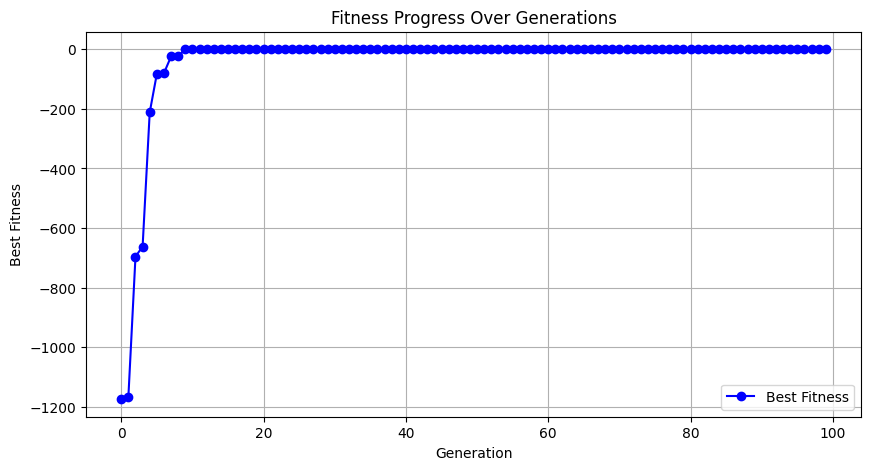

In [16]:
problem = Problem(2, -50, 50)
pop_size = 10
max_gen = 100
p_m = 0.5
p_c = 0.5

fitness_history, solution = GA(problem, pop_size, max_gen, p_c, p_m)

for i in range(len(fitness_history)):
  print(f"Generation {i}, best fitness: {fitness_history[i]:.2f}")

np.set_printoptions(precision = 2, suppress=True)
print("Solution:")
print(decode(solution.chromosome, problem))
print(f"{solution.fitness:.2f}")

generations = list(range(len(fitness_history)))
plt.figure(figsize=(10, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')

plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()